# Introduction to ML Strategy

## Why ML Strategy
- A good ML strategy gives you directions in how to progress efficiently, given all the following ideas.

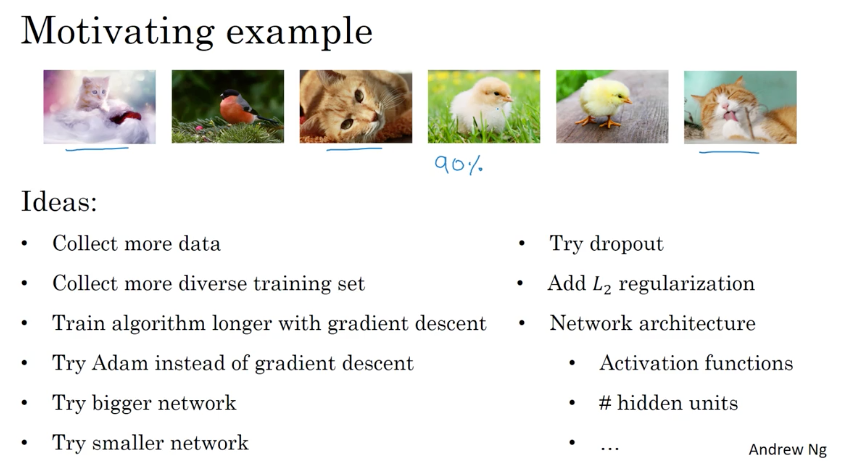

## Orthogonalization
- The most effective machine learning people are very clear-eyed about what to tune in order to achieve one effect.
    - This is a process called **orthogonalization**.
- **Chain of Assumptions in ML and Tuning Strategies**
    - Fit training set well on cost function
        - Bigger network
        - Adam...
    - Fit dev set well on cost function
        - Regularization
        - Bigger training set
    - Fit test set well on cost function
        - Bigger dev set
    - Performs well in real world
        - Change the dev set or cost function
- About **Early Stopping**
    - Early stopping is not as orthogonalized, as it affects performances on both training set and dev set simultaneously. 
    - That's why Andrew Ng doesn't use it as much.

# Setting Up Your Goal

## Single Number Evaluation Metric
- As an example, we can use both **precision** and **recall** to evaluate the performance of classifiers.
    - Precision: % of recognized cats are actual cats
    - Recall: % of actual cats are correctly recognized
- The problem arises when one model has a higher precision, while the other has a higher recall.
- To solve this problem, we need to use a single number evaluation metric called **FI score**, which can be considered the "average" of precision and recall.
    - $FI = \frac{2}{\frac{1}{P} + \frac{1}{R}}$

## Satisficing and Optimizing Metric
- Assuming that there are $N$ metrics that we care about.
- We can select the single metric that we care about the most as the **optimizing** metric, and then set the other $N-1$ metrics as **satisfying** metrics with thresholds.
- E.g. We pick the model that maximizes accuracy subject to running time $\leq 100ms$
    - Optimizing: accuracy
    - Satisfying: running time

## Train/Dev/Test Distributions
- The best practice is to make sure the **dev and test** sets come from the **same distribution**.
- In the example below, instead of dividing train/dev/test sets by regions, a better practice is to **randomly shuffle** all the data and divide data by proportion.

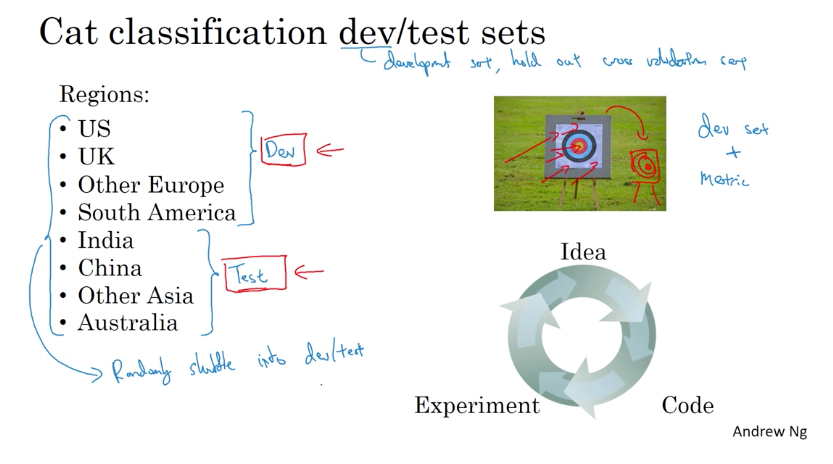

- Guideline
    - Choose a dev set and test set to reflect data you expect to get in the future and consider important to do well on, where the dev set and test set should come from the same distribution.

## Size of the Dev and Test Sets
- Old Way of Splitting Data
    - 70% train, 30% test
    - 60% train, 20% dev, 20% test
        - The traditional 70/30 or 60/20/20 rules might be a good practice when data size was small in the old days.
- In the Era of Big Data (we can easily get > 1 million exmaples)
    - 98% train, 1% dev, 1% test
        - This would be better, as we will still have plenty enough examples in the dev/test sets.
- Guideline for Size of Test Set
    - Set your test set to be big enough to give high confidence in the overall performance of your system.

## When to Change Dev/Test Sets and Metrics
- When your metric is not giving the same conclusion as your/users' preference, you may want to update the metric. 
- In the example below, we are using precision as the metric when training a cat classifier.
    - However, although algorithm A has higher precision, it also recognizes pornographic images as cats.
    - We have to update the metric to "punish" algorithm for making this mistake.
    
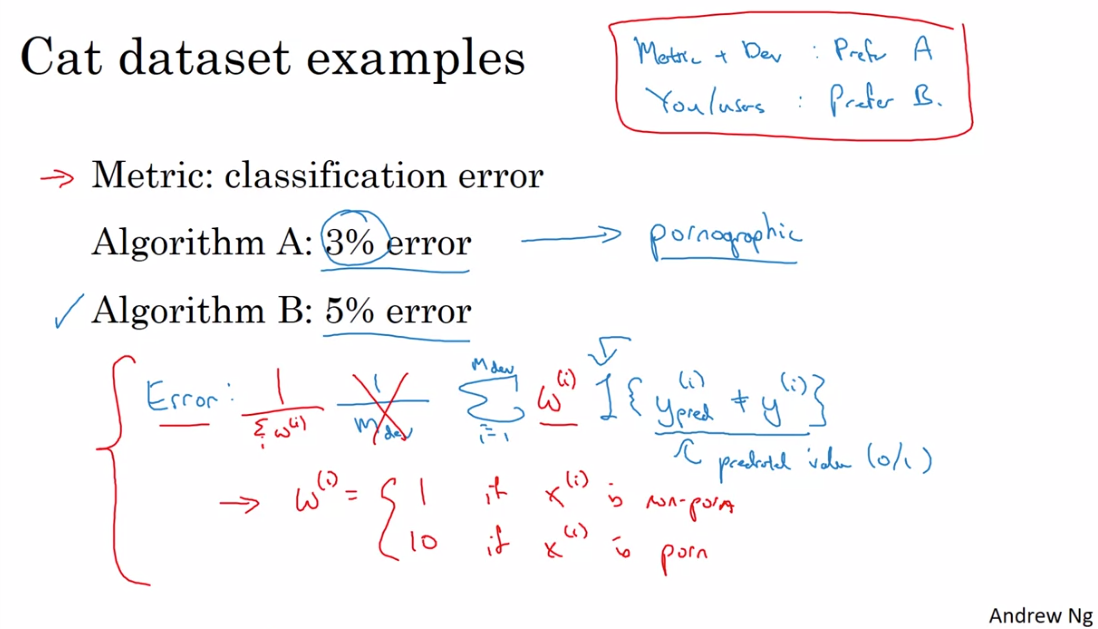

- Orthogonalization
    - Notice that everything above is about **defining a metric** to evaluate classifier.
    - How to do well on this metric is a **separate task**.
        - E.g. We should probably update the loss function as well to address the anti-porn consideration.
        
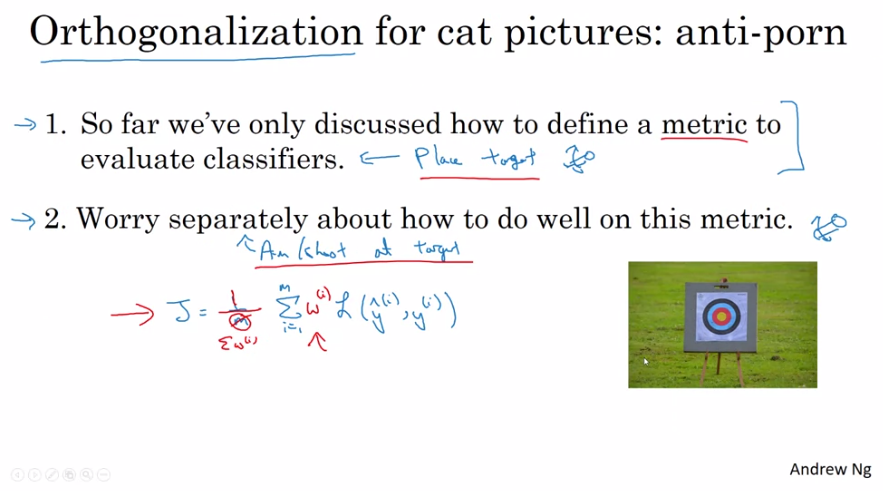

- In addition, if the model is doing well on your metric + dev/test set but does not do well on the actual application, change your metric and/or your dev/test set.

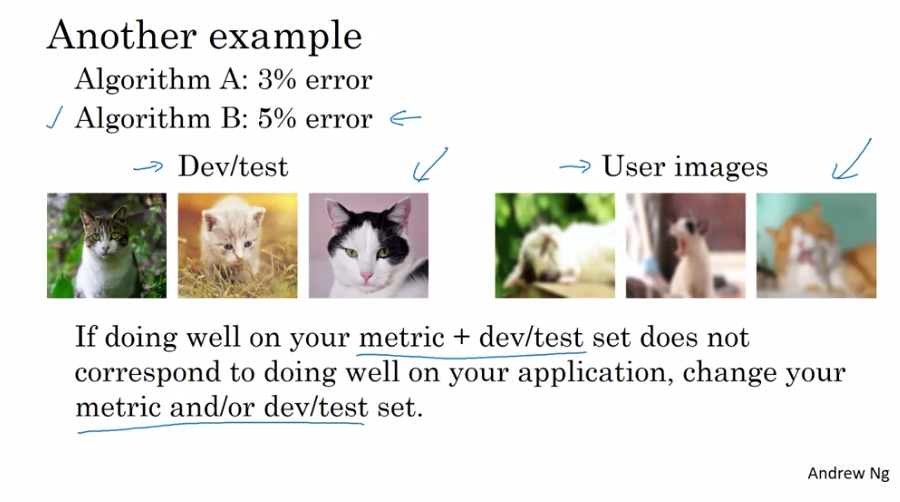

# Comparing to Human-Level Performance

## Why Human-Level Performance?
- Humans are quite good at a lot of tasks.
- So long as ML is worse than humans, we can:
    - Get labeled data from human
    - Gain insight from manual error analysis: Why did a person get this right?
    - Better analysis of bias/variance
        
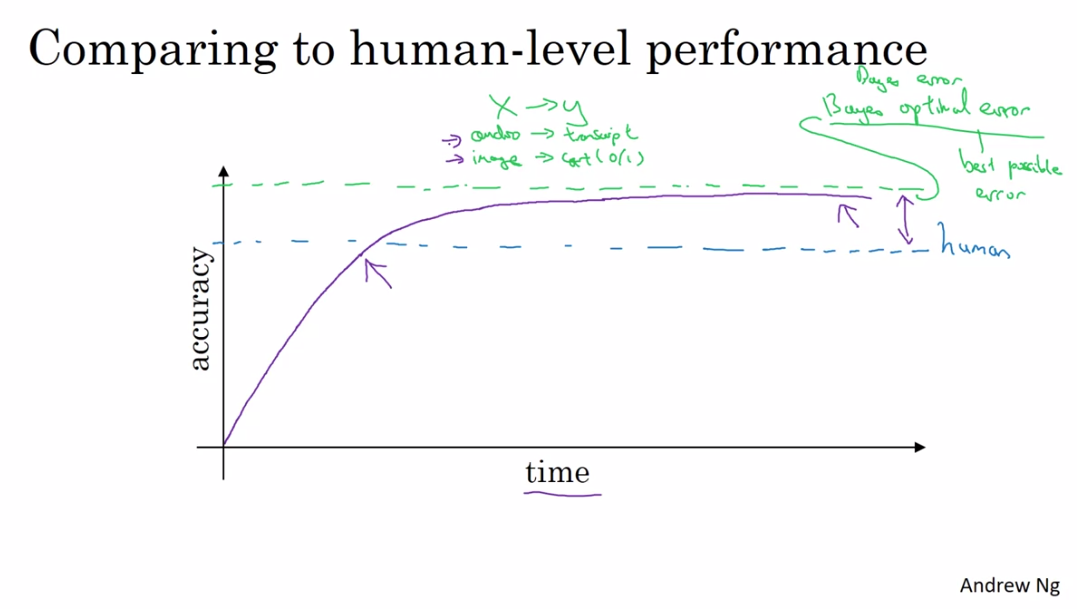

## Avoidable Bias
- Use human-level error as a proxy for Bayes error.
- We call the difference between the training error and Bayes error the **Avoidable Bias**.
    - If algothrim training error is much higher than human-level error, we may want to focus more on bias reduction to acheive better performance on the training set.
    - If algorithm training error is close to human-level error but dev error is much higher, we should then focus more on variance reduction.
    
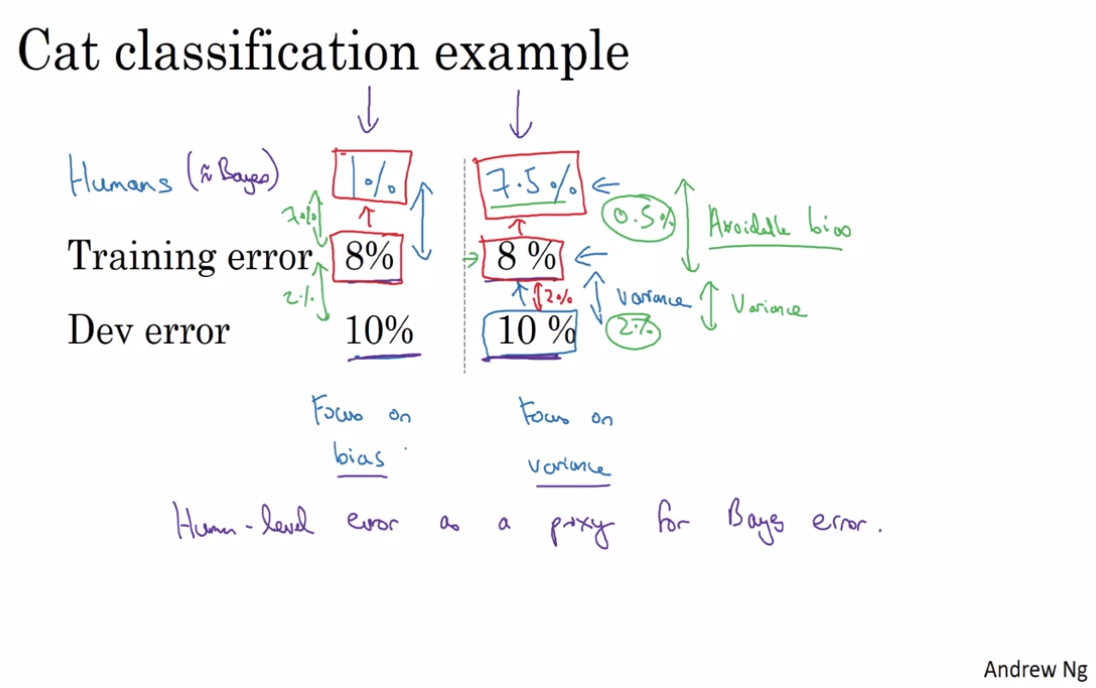

## Understanding Human-Level performance
- Define Huamn-Level Performance
    - In the example below, if the goal is to show that the algorithm can surpass a single human and therefore can be depoyed in some context, then the error rate of a single doctor might be an appropriate definition.
    - If the goal is to use human-level performance as the proxy for Bayes error, then we should pick the lowest error observed and state that the true Bayes error is equal to or smaller than this value.
    
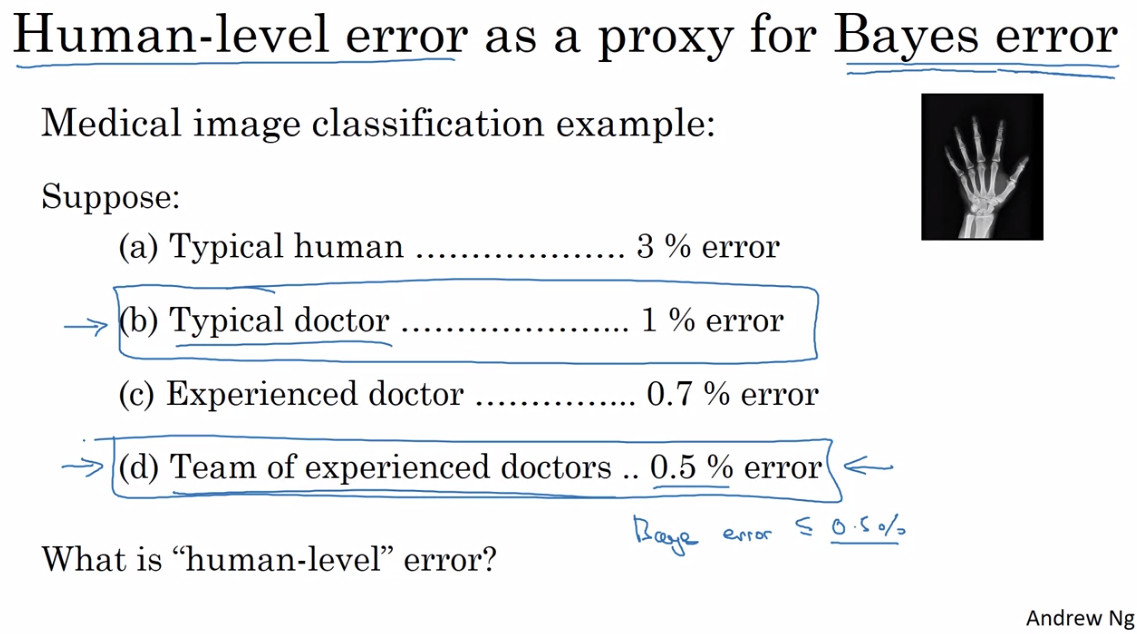

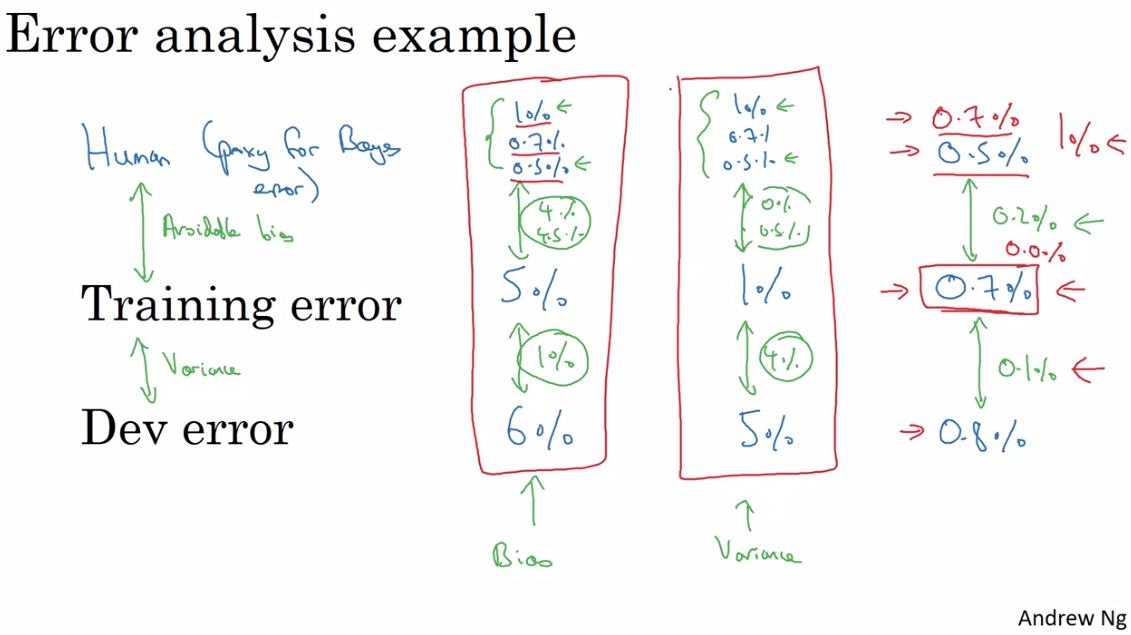

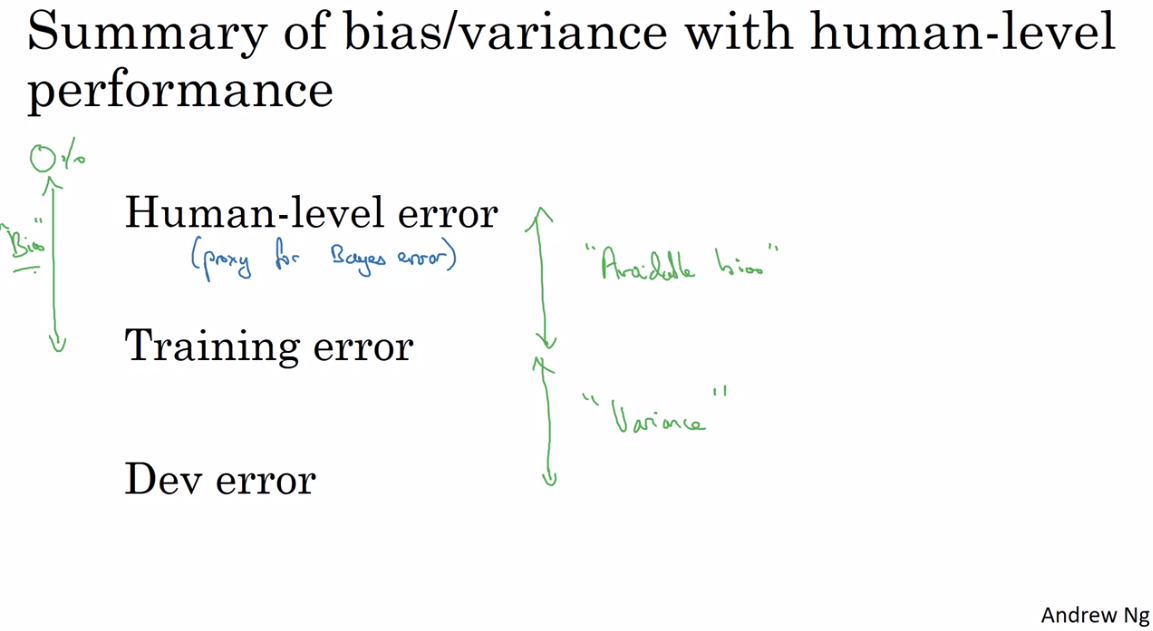

## Surpassing Human-Level Performance
- When both training error and dev error is lower than Bayes error proxied by human-level performance, it's then hard to tell how much is the avoidable bias, which then makes it hard to tell wether we should focus more on bias or variance reduction.
- Problems where ML significantly surpasses human-level performance
    - Online advertising
    - Product recommendations
    - Logistics (e.g. predicting transit time)
    - Loan approvals
        - Algorithms can do better than human on these problems because of the following reasons
            - Structural data
            - Not natural perception
            - Lots of data

## Improving Your Model Performance
- Two Fundamental Assumptions of Supervised Learning
    1. You can fit the training set pretty well.
        - i.e. Low avoidable bias can be achieved.
        - Methods for **reducing (avoidable) bias**
            - Train bigger model
            - Train longer/using better optimization algorithms
                - Momentum, RMSprop, Adam, ...
            - Change neural network architecture/hyperparameters search
    2. The training set performance generalizes well to the dev/test set.
        - i.e. Low variance can be achieved.
        - Methods for **reducing variance**
            - More data
            - Regularization
                - $l_{2}$ normalization
                - Dropout
                - Data augmentation
            - Change neural network architecture/hyperparameter search